In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [3]:
##importing Dataset
Data=pd.read_excel(r'C:\Users\HP\Desktop\webmd.xlsx')


Analsising Data set

In [4]:
Data

,Ages,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75-85,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75-85,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,2009-06-01 00:00:00,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


In [5]:
Data.shape

(362806, 12)

In [6]:
Data.nunique()

Ages                 12
Condition          1805
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250158
Satisfaction          7
Sex                   2
Sides              1650
UsefulCount         148
dtype: int64

In [7]:
Data.dtypes

Ages             object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [8]:
Data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


Checking Null values

In [9]:
Data.isna().sum()

Ages             12187
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             49
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [10]:
df=Data

Handling Missing values

In [11]:
##Handling missing data
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset =df.columns, inplace=True)
df=df.reset_index(drop=True)

In [12]:
Data.isna().sum()

Ages             0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [13]:
df.shape

(315577, 12)

Checking for duplicates

In [14]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
315572    False
315573    False
315574    False
315575    False
315576    False
Length: 315577, dtype: bool

Removing Duplicates

In [ ]:
##Handling duplicate values
df.drop_duplicates(keep='first',inplace=True)
df=df.reset_index(drop=True)

In [16]:
df.shape

(315130, 12)

In [17]:
df.drop(['Reviews','Date'],axis=1,inplace=True)

In [18]:
df.columns

Index(['Ages', 'Condition', 'Drug', 'DrugId', 'EaseofUse', 'Effectiveness',
       'Satisfaction', 'Sex', 'Sides', 'UsefulCount'],
      dtype='object')

Checking correlation among features

<AxesSubplot:>

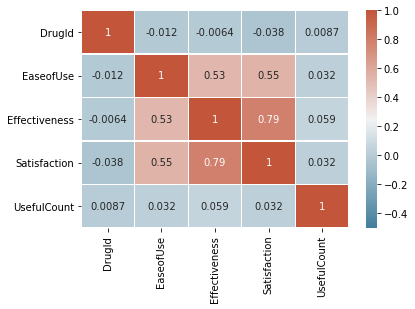

In [19]:
##checking correlation
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(),cmap = cmap,vmin=-0.5,vmax=1.0,linewidths=0.4,annot=True)

In [20]:
##we can drp ,Drug ID,Effectiveness

Removing highly correlated features

In [21]:
df.drop(['DrugId','Effectiveness'],axis=1,inplace=True)

In [22]:
df.columns

Index(['Ages', 'Condition', 'Drug', 'EaseofUse', 'Satisfaction', 'Sex',
       'Sides', 'UsefulCount'],
      dtype='object')

In [23]:
df.nunique()

Ages              12
Condition       1639
Drug            5278
EaseofUse          6
Satisfaction       6
Sex                2
Sides           1617
UsefulCount      144
dtype: int64

Exploratory Data Analysis

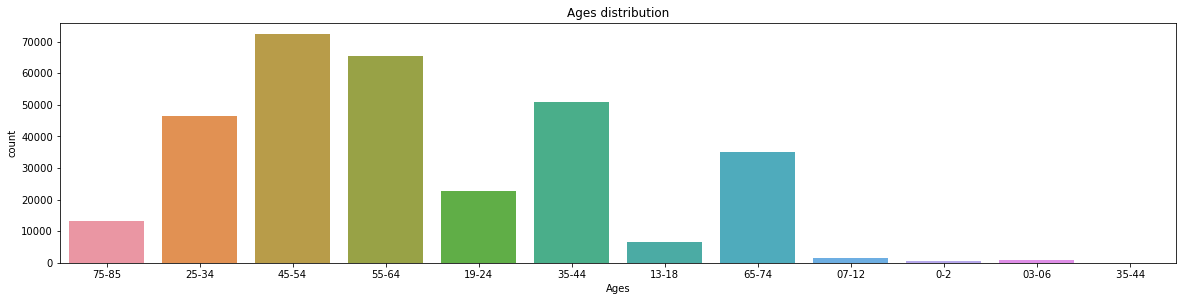

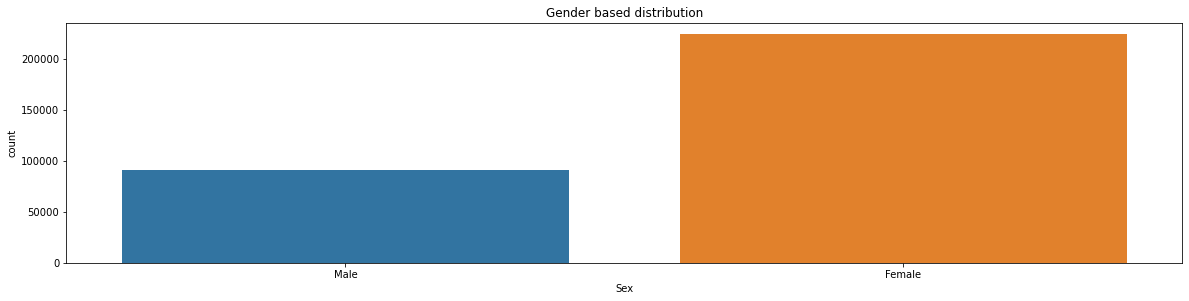

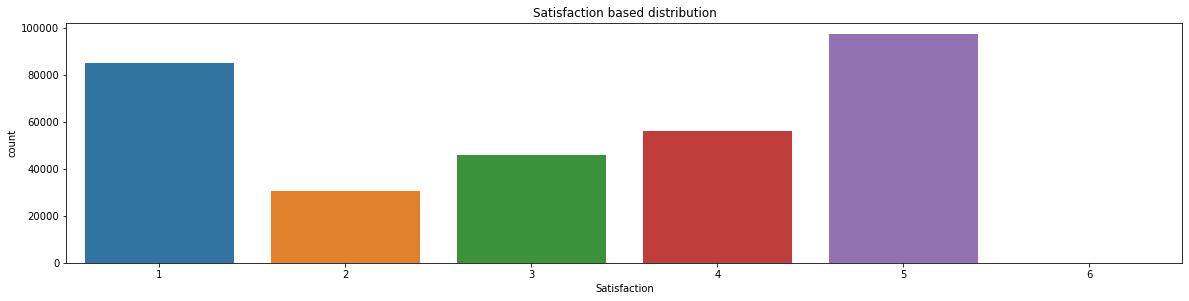

<Figure size 432x288 with 0 Axes>

In [24]:
##Exploratory Data Analysis
plt.figure(figsize=(20,15))

plt.subplot(3,1,1)
sns.countplot(x='Ages', data=df)
plt.title('Ages distribution')
plt.xlabel('Ages')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(3,1,2)
sns.countplot(x='Sex', data=df)
plt.title('Gender based distribution')
plt.xlabel('Sex')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(20,15))
plt.subplot(3,1,3)
sns.countplot(x='Satisfaction', data=df)
plt.title('Satisfaction based distribution')
plt.xlabel('Satisfaction')
plt.ylabel('count')
plt.show()

plt.tight_layout()

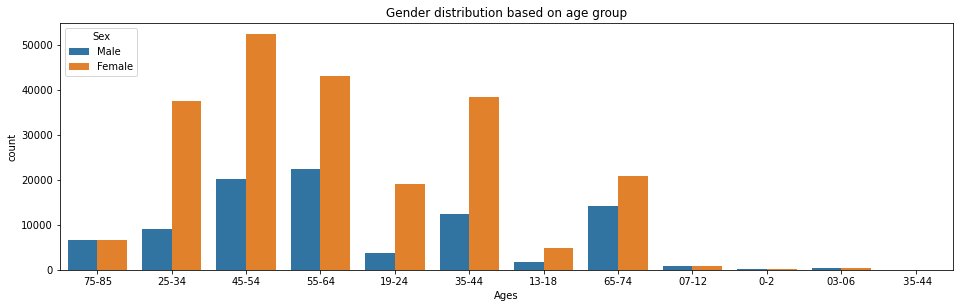

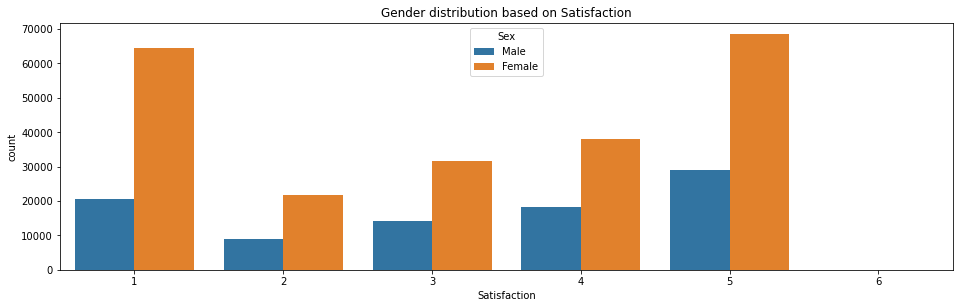

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
sns.countplot(x='Ages', data=df,hue='Sex')
plt.title('Gender distribution based on age group')
plt.xlabel('Ages')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(2,1,2)
sns.countplot(x='Satisfaction', data=df, hue='Sex')
plt.title('Gender distribution based on Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('count')
plt.show()

plt.tight_layout()

In [26]:
top_10_drugs=df["Drug"].value_counts().sort_values(ascending=False)[:10]

top_10_drugs_df=pd.DataFrame(zip(top_10_drugs.index, top_10_drugs), columns = ["Drug", "count"])

Text(0.5, 0, 'drug name')

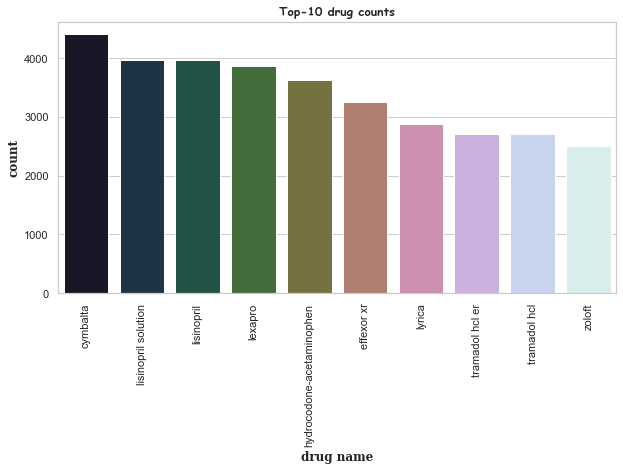

In [27]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Drug", y="count", data=top_10_drugs_df, palette=sns.color_palette("cubehelix", 10))
plt.xticks(rotation=90)
plt.title("Top-10 drug counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("drug name", {"fontname": "serif", "fontweight":"bold"})

In [28]:
top_10_condition=df["Condition"].value_counts().sort_values(ascending=False)[:10]

top_10_condition_df=pd.DataFrame(zip(top_10_condition.index, top_10_condition), columns = ["Condition", "count"])

Text(0.5, 0, 'condition')

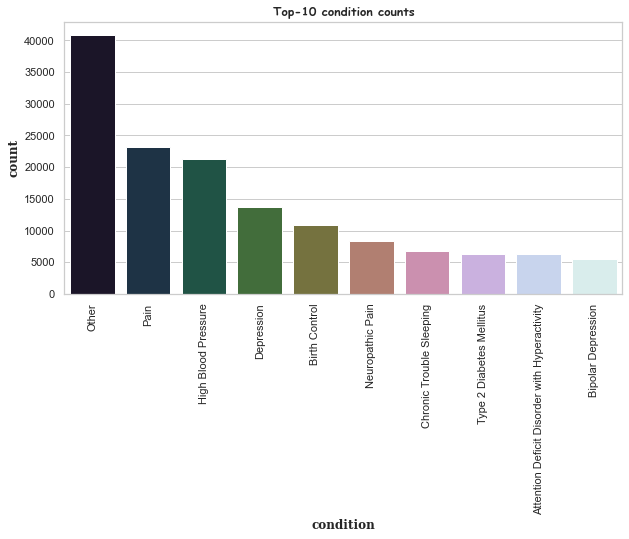

In [29]:
#counts of top 10 drugs
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.barplot(x="Condition", y="count", data=top_10_condition_df, palette=sns.color_palette("cubehelix", 10))
plt.xticks(rotation=90)
plt.title("Top-10 condition counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("condition", {"fontname": "serif", "fontweight":"bold"})

Encoding Features

In [30]:
##Encoding categorical features
df['Lower age'],df['Upper age'] = zip(*df['Ages'].map(lambda x: x.split('-')))

In [31]:
df.drop('Ages',axis=1,inplace=True)

In [32]:
df

,Condition,Drug,EaseofUse,Satisfaction,Sex,Sides,UsefulCount,Lower age,Upper age
0,Stuffy Nose,25dph-7.5peh,5,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,75,85
1,Cold Symptoms,25dph-7.5peh,5,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,25,34
2,Birth Control,wymzya fe,5,2,Female,"Nausea , vomiting , headache , bloating , ...",0,25,34
3,Disease of Ovaries with Cysts,wymzya fe,5,5,Female,"Nausea , vomiting , headache , bloating , ...",0,45,54
4,Acne,wymzya fe,4,2,Female,"Nausea , vomiting , headache , bloating , ...",1,25,34
...,...,...,...,...,...,...,...,...,...
315125,Stop Smoking,chantix,2,4,Female,"Nausea , headache , vomiting , drowsiness, g...",5,25,34
315126,Stop Smoking,chantix,5,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2,55,64
315127,Stop Smoking,chantix,2,2,Female,"Nausea , headache , vomiting , drowsiness, g...",3,25,34
315128,Stop Smoking,chantix,5,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1,55,64


In [33]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Condition','Drug','Satisfaction','EaseofUse','UsefulCount','Sides']
for i in np.arange(len(a)):
  df[a[i]]=label_en.fit_transform(df[a[i]])

In [34]:
df 

,Condition,Drug,EaseofUse,Satisfaction,Sex,Sides,UsefulCount,Lower age,Upper age
0,1455,4,4,4,Male,403,0,75,85
1,393,4,4,4,Female,403,1,25,34
2,221,5103,4,1,Female,1028,0,25,34
3,514,5103,4,4,Female,1028,0,45,54
4,51,5103,3,1,Female,1028,1,25,34
...,...,...,...,...,...,...,...,...,...
315125,1446,900,1,3,Female,895,5,25,34
315126,1446,900,4,4,Female,895,2,55,64
315127,1446,900,1,1,Female,895,3,25,34
315128,1446,900,4,4,Male,895,1,55,64


In [35]:
df = pd.concat([df.drop('Sex', axis=1), pd.get_dummies(df['Sex'])], axis=1)

In [36]:
df

,Condition,Drug,EaseofUse,Satisfaction,Sides,UsefulCount,Lower age,Upper age,Female,Male
0,1455,4,4,4,403,0,75,85,0,1
1,393,4,4,4,403,1,25,34,1,0
2,221,5103,4,1,1028,0,25,34,1,0
3,514,5103,4,4,1028,0,45,54,1,0
4,51,5103,3,1,1028,1,25,34,1,0
...,...,...,...,...,...,...,...,...,...,...
315125,1446,900,1,3,895,5,25,34,1,0
315126,1446,900,4,4,895,2,55,64,1,0
315127,1446,900,1,1,895,3,25,34,1,0
315128,1446,900,4,4,895,1,55,64,0,1


Splitting into dependent and independent features

In [37]:
X=df.drop('Sides',axis=1)

In [38]:
y=df['Sides']

In [39]:
y

0          403
1          403
2         1028
3         1028
4         1028
          ... 
315125     895
315126     895
315127     895
315128     895
315129     895
Name: Sides, Length: 315130, dtype: int32

Scaling independent features

In [40]:
## Scaling 
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)
X=pd.DataFrame(X)

In [41]:
X

,0,1,2,3,4,5,6,7,8
0,1.505423,-1.822254,0.731143,1.149967,-0.737184,1.984163,1.970936,-1.568185,1.568185
1,-0.986117,-1.822254,0.731143,1.149967,-0.627490,-1.128054,-1.052339,0.637680,-0.637680
2,-1.389644,1.603784,0.731143,-0.722535,-0.737184,-1.128054,-1.052339,0.637680,-0.637680
3,-0.702241,1.603784,0.731143,1.149967,-0.737184,0.116832,0.133259,0.637680,-0.637680
4,-1.788478,1.603784,-0.042405,-0.722535,-0.627490,-1.128054,-1.052339,0.637680,-0.637680
...,...,...,...,...,...,...,...,...,...
315125,1.484308,-1.220228,-1.589500,0.525799,-0.188715,-1.128054,-1.052339,0.637680,-0.637680
315126,1.484308,-1.220228,0.731143,1.149967,-0.517797,0.739276,0.726058,0.637680,-0.637680
315127,1.484308,-1.220228,-1.589500,-0.722535,-0.408103,-1.128054,-1.052339,0.637680,-0.637680
315128,1.484308,-1.220228,0.731143,1.149967,-0.627490,0.739276,0.726058,-1.568185,1.568185


Splitting into training and test set

In [42]:
from sklearn.model_selection import train_test_split



In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
##from sklearn.decomposition import PCA
#Make an instance of the Model
##pca = PCA(.95)

In [ ]:
##pca.fit(X_train)

In [ ]:
##X_train = pca.transform(X_train)
##X_test = pca.transform(X_test)

In [ ]:
##X_train=pd.DataFrame(X_train)
##X_test=pd.DataFrame(X_test)

In [ ]:
##Logistic Regression
##from sklearn.linear_model import LogisticRegression
##logit=LogisticRegression(solver='lbfgs')
##logit.fit(X_train,y_train)
##y_pred3=logit.predict(X_test)

Model formation

In [43]:
##Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_depth=10)
rf_model.fit(X_train,y_train)




RandomForestClassifier(max_depth=10, n_estimators=1000)

In [44]:
y_pred3=rf_model.predict(X_test)

In [43]:
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
  

In [52]:
print('Accuracy score is ',accuracy_score(y_pred3,y_test))
print('f1 score is ',f1_score(y_pred3,y_test,average='micro'))
print('Recall score is ',recall_score(y_pred3,y_test,average='weighted',zero_division=1))
print('pres score is ',precision_score(y_pred3,y_test,average='weighted',zero_division=1))


Accuracy score is  0.5088026604724369
f1 score is  0.5088026604724369
Recall score is  0.5088026604724369
pres score is  0.8530135857821807


In [53]:
Feature_import=pd.Series(rf_model.feature_importances_,index=X.columns).sort_values(ascending=False)*100

In [54]:
Feature_import

1    54.901721
0    35.929911
4     2.902638
6     1.894985
5     1.805186
3     0.974507
8     0.540549
2     0.532592
7     0.517911
dtype: float64

In [55]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=3,class_weight='balanced',random_state=42,splitter='best')
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=3,
                       random_state=42)

In [56]:
y_pred4=d_tree.predict(X_test)

In [57]:
print('Accuracy score is ',accuracy_score(y_pred4,y_test))
print('f1 score is ',f1_score(y_pred4,y_test,average='micro'))
print('Recall score is ',recall_score(y_pred4,y_test,average='weighted',zero_division=1))
print('pres score is ',precision_score(y_pred4,y_test,average='weighted',zero_division=1))

Accuracy score is  0.9814173108411713
f1 score is  0.9814173108411713
Recall score is  0.9814173108411713
pres score is  0.9831853285318358


In [59]:
from sklearn.neighbors import KNeighborsClassifier
acc_value=[] 
neighbor= np.arange(2,10,1)
for k in neighbor:
  knn_model=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  knn_model.fit(X_train,y_train)
  y_pred=knn_model.predict(X_test)
  acc=accuracy_score(y_pred,y_test)
  acc_value.append(acc)

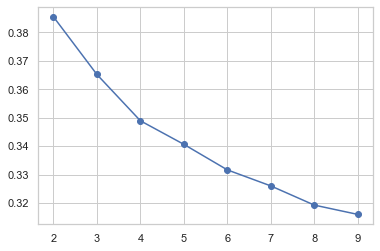

In [60]:
plt.plot(neighbor,acc_value,'o-')
plt.show()

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',metric='minkowski')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [62]:
y_pred7=knn.predict(X_test)

In [63]:
print('Accuracy score is ',accuracy_score(y_pred7,y_test))
print('f1 score is ',f1_score(y_pred7,y_test,average='micro'))
print('Recall score is ',recall_score(y_pred7,y_test,average='weighted',zero_division=1))
print('pres score is ',precision_score(y_pred7,y_test,average='weighted',zero_division=1))

Accuracy score is  0.4734016221773733
f1 score is  0.4734016221773733
Recall score is  0.4734016221773733
pres score is  0.5061862375932735


In [ ]:
#SVM
from sklearn.svm import SVC
sv=SVC(kernel='rbf', degree=3,class_weight='balanced')
sv.fit(X_train,y_train) 


In [ ]:
y_pred8=sv.predict(X_test)

In [ ]:
print('Accuracy score is ',accuracy_score(y_pred7,y_test))
print('f1 score is ',f1_score(y_pred7,y_test,average='micro'))
print('Recall score is ',recall_score(y_pred7,y_test,average='weighted',zero_division=1))
print('pres score is ',precision_score(y_pred7,y_test,average='weighted',zero_division=1))